<a href="https://colab.research.google.com/github/ChrisMath26/Bases_ML/blob/main/Red%20neuronal%20artificial/Christian_Trilleras_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks

Considere el siguiente ejemplo de un conjunto de datos proporcionado por un banco. Entrene una red neuronal para predecir si los clientes en este banco se retirarán o no.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
datos = pd.read_csv('Churn_Modelling.csv')
datos.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#seleccionamos variables de interes
x = datos.iloc[:, 3:-1].values
y = datos.iloc[:, -1].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
x = ct.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,5:] = sc.fit_transform(x_train[:,5:])
x_test[:,5:] = sc.transform(x_test[:,5:])
x_train = x_train.astype('float')
x_test = x_test.astype('float')

## Inicializar la red neuronal

In [ ]:
ann = tf.keras.models.Sequential()

## Agregar capas ocultas

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

## Agregar capa de salida

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Entrenamiento de la red

### Compilar la ANN

In [ ]:
ann.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

### Entrenar la ANN

In [ ]:
ann.fit(x_train, y_train,
        batch_size=32, ### Lotes de qué tamaño,
        epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7238 - loss: 0.5536
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.4573
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8123 - loss: 0.4256
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8233 - loss: 0.4030
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.3925
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8468 - loss: 0.3739
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3518
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.3503
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.3461
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.3515
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8525 - loss: 0.3589
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Predecir y Evaluar

In [ ]:
# TODO
y_pred = ann.predict(x_test)
y_pred = y_pred > 0.5

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy: 0.8605
Confusion Matrix:
[[1525   70]
 [ 209  196]]


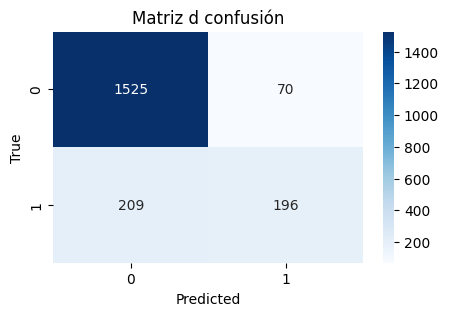

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {ac}')
print('Confusion Matrix:')
print(cm)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz d confusión')
plt.show()

#Tarea de regresión

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
data = pd.read_csv('datos_energia.csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann2 = tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units=5, activation='tanh'))   # Capa oculta 1
ann2.add(tf.keras.layers.Dense(units=5, activation='relu'))   # Capa oculta 2
ann2.add(tf.keras.layers.Dense(units=1))                      # Capa de salida

In [ ]:
ann2.compile(optimizer='adam', loss='mean_squared_error')  ## la función de pérdida debe ser acorde al problema q se esta trabajando i.e de regresion

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', ### Esto sirve para ahorrar tiempo, es una manera inteligente y rápida de hacer las cosas
                               patience=4)          ### Si entre las últimas dos épocas no hay cambios significativos, para
ann2.fit(X_train, y_train, batch_size=32, epochs=200,
         validation_data = (X_test, y_test),
         callbacks = early_stopping)


Epoch 1/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 206600.0625 - val_loss: 205192.4531
Epoch 2/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 204808.8750 - val_loss: 201766.7031
Epoch 3/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 200655.3438 - val_loss: 193483.0781
Epoch 4/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 190542.9219 - val_loss: 179059.2031
Epoch 5/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175433.5625 - val_loss: 163448.9688
Epoch 6/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 159609.6875 - val_loss: 147327.6094
Epoch 7/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 143387.8594 - val_loss: 131044.6406
Epoch 8/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 127087.2031 - val_loss: 114931.5000
Epoch 9/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 111361.1016 - val_loss: 99274.0547
Epoch 10/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95920.8438 - val_loss: 84331.7500
Epoch 11/200
240/240 ━━━━━━━━━━━

In [ ]:
ann2.summary()  ### Resumen de la red entrenada

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 5)                   │              25 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185 (744.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 124 (500.00 B)

In [ ]:
historia = ann2.history.history
historia

{'loss': [206344.875,
  204071.59375,
  198575.140625,
  186825.40625,
  171642.828125,
  155734.765625,
  139492.078125,
  123253.515625,
  107327.5234375,
  91989.7578125,
  77480.6328125,
  64006.46484375,
  51742.26171875,
  40814.09375,
  31311.234375,
  23271.322265625,
  16680.060546875,
  11475.6455078125,
  7537.95458984375,
  4710.11572265625,
  2801.108154296875,
  1604.1932373046875,
  913.9833374023438,
  551.2153930664062,
  376.337158203125,
  288.04473876953125,
  227.0067596435547,
  199.4632568359375,
  185.2257843017578,
  177.00515747070312,
  172.40367126464844,
  168.23085021972656,
  164.1875,
  159.74188232421875,
  155.51907348632812,
  151.0245361328125,
  146.3889617919922,
  141.26036071777344,
  135.58807373046875,
  129.30311584472656,
  122.05712890625,
  114.36416625976562,
  105.89513397216797,
  96.7790298461914,
  87.509521484375,
  78.21012115478516,
  69.85765838623047,
  62.707542419433594,
  56.823524475097656,
  52.07185745239258,
  48.1545906066

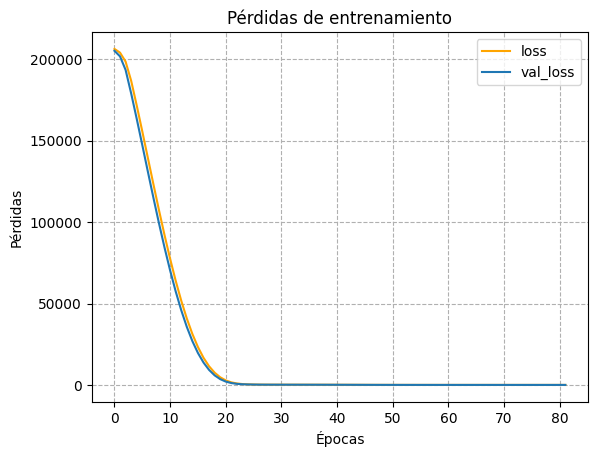

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(historia['loss'], label='loss', color = 'orange')
plt.plot(historia['val_loss'], label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdidas')
plt.title('Pérdidas de entrenamiento')
plt.grid(True, linestyle = '--')
plt.legend()
plt.show()

In [ ]:
prediccion = ann2.predict(X_test)
prediccion

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[458.00113],
       [438.00827],
       [433.85764],
       ...,
       [480.5613 ],
       [434.4368 ],
       [456.45224]], dtype=float32)

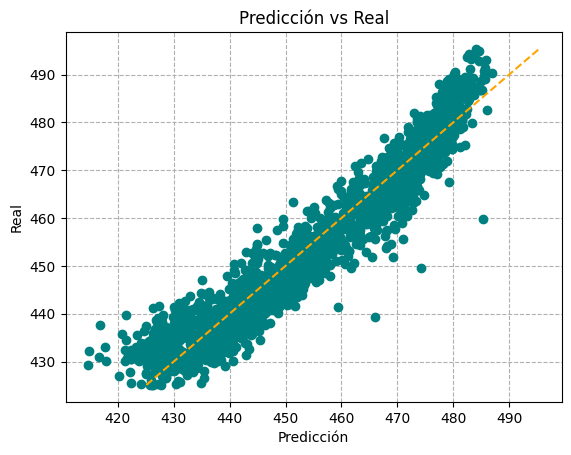

In [ ]:
plt.plot(prediccion, y_test, 'o', color = 'teal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'orange', linestyle = '--')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Predicción vs Real')
plt.grid(True, linestyle = '--')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediccion)
mse = mean_squared_error(y_test, prediccion)
r2 = r2_score(y_test, prediccion)

print(f'El MAE score es: {mae}')
print(f'El MSE score es: {mse}')
print(f'El r^2 score es: {r2}')

El MAE score es: 3.968010178010915
El MSE score es: 25.346105597947915
El r^2 score es: 0.912617106394746
